In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)

# import warnings; 
# warnings.filterwarnings('ignore')

import os
import sys
sys.path.append(os.path.abspath('../'))
import abupy

only use pandas calc nd, please install talib!


## 因为需要全市场回测所以本章无法使用沙盒数据

# 第11章 量化系统-机器学习•ABU

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_train_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_train_benchmark


买入后卖出的交易数量:81134
胜率:44.8986%
平均获利期望:10.0778%
平均亏损期望:-6.0204%
盈亏比:1.3215
策略收益: 59.7046%
基准收益: 98.3523%
策略年化收益: 11.9409%
基准年化收益: 19.6705%
策略买入成交比例:30.6887%
策略资金利用率比例:87.9984%
策略共执行1260个交易日


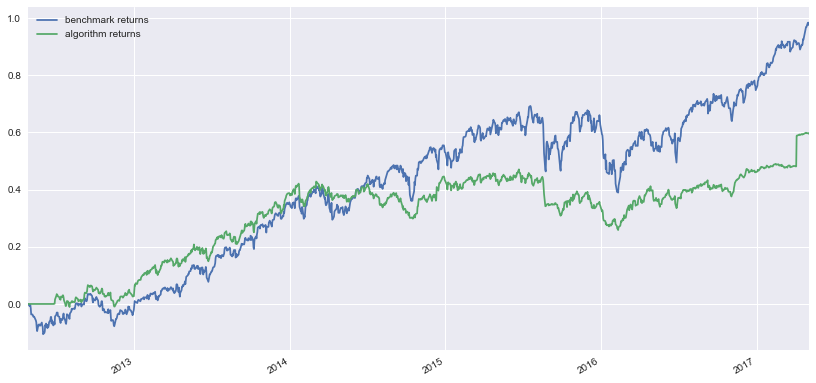

In [3]:
from abupy import AbuMetricsBase, EStoreAbu, abu
# 读取之前保存的训练集交易数据
abu_result_tuple_train = \
    abu.load_abu_result_tuple(5, EStoreAbu.E_STORE_TRAIN)
metrics = AbuMetricsBase(*abu_result_tuple_train)
metrics.fit_metrics()
# 图11-1所示
metrics.plot_returns_cmp(only_show_returns=True)

### 11.1 搜索引擎与量化交易

In [4]:
from abupy import ABuMarketDrawing
orders_pd_train = abu_result_tuple_train.orders_pd

In [ ]:
# 选择失败的前20笔交易绘制交易快照
# 这里只是示例，实战中根据需要挑选，rank或者其他方式
plot_simple = orders_pd_train[orders_pd_train.profit_cg < 0][:20]
# save=True保存在本地， 文件保存在~/abu/data/save_png/中
ABuMarketDrawing.plot_candle_from_order(plot_simple, save=True)

## 11.2 主裁

### 11.2.1 角度主裁

In [4]:
from abupy import AbuUmpMainDeg
# 参数为orders_pd
ump_deg = AbuUmpMainDeg(orders_pd_train)
# df即由之前ump_main_make_xy生成的类df，表11-1所示
ump_deg.fiter.df.head()

,result,deg_ang21,deg_ang42,deg_ang60,deg_ang252
2012-06-27,0,20.810,20.123,10.881,-35.994
2012-06-27,0,7.607,4.116,-0.453,20.657
2012-06-27,1,4.911,1.140,-9.395,-20.538
2012-06-27,0,21.643,6.520,-5.124,2.189
2012-06-27,0,3.938,4.310,2.269,2.376


## 耗时操作，大概需要10几分钟，具体根据电脑性能，cpu情况

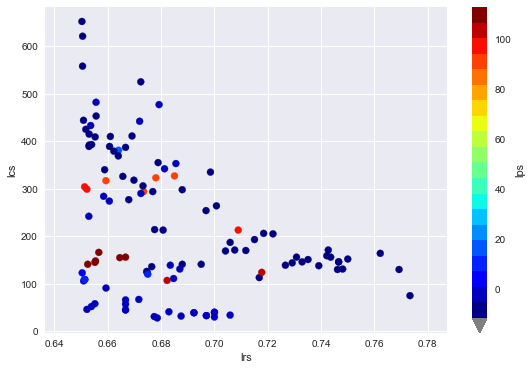

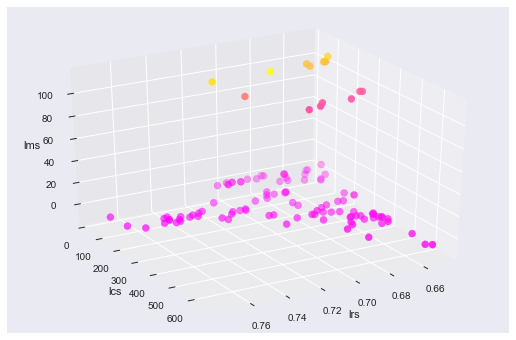

In [5]:
_ = ump_deg.fit(brust_min=False)

In [7]:
# 表11-2所示
ump_deg.cprs

,lcs,lrs,lps,lms
40_31,317.0,0.659306,93.000767,0.293378
41_31,304.0,0.651316,96.312238,0.316817
42_15,109.0,0.651376,-2.590113,-0.023763
42_31,299.0,0.652174,96.102533,0.321413
43_15,67.0,0.671642,-3.200991,-0.047776
43_31,242.0,0.652893,-1.929739,-0.007974
44_31,323.0,0.678019,92.150414,0.285295
45_15,57.0,0.666667,-2.230381,-0.039129
45_31,277.0,0.667870,-5.024114,-0.018138
46_31,294.0,0.673469,91.324940,0.310629


In [6]:
max_failed_cluster = ump_deg.cprs.loc[ump_deg.cprs.lrs.argmax()]
print('失败概率最大的分类簇{0}, 失败率为{1:.2f}%, 簇交易总数{2}, ' \
      '簇平均交易获利{3:.2f}%'.format(ump_deg.cprs.lrs.argmax(),
                               max_failed_cluster.lrs * 100,
                               max_failed_cluster.lcs,
                               max_failed_cluster.lms * 100))

失败概率最大的分类簇84_59, 失败率为77.33%, 簇交易总数75.0, 簇平均交易获利-6.98%


84


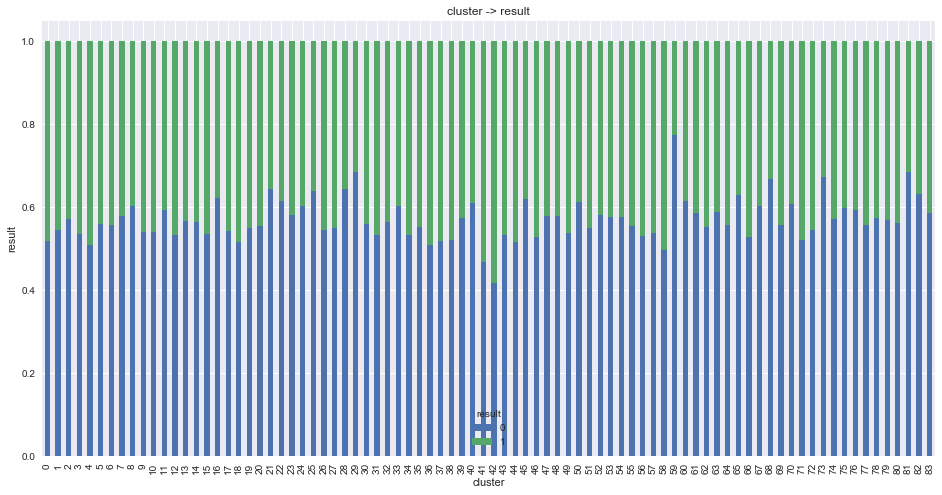

In [8]:
cpt = int(ump_deg.cprs.lrs.argmax().split('_')[0])
print(cpt)
ump_deg.show_parse_rt(ump_deg.rts[cpt])

In [9]:
max_failed_cluster_orders = ump_deg.nts[ump_deg.cprs.lrs.argmax()]
# 表11-3所示
max_failed_cluster_orders

,result,deg_ang21,deg_ang42,deg_ang60,deg_ang252,ind,cluster,profit
2012-07-19,0,9.026,6.480,-21.176,-29.295,1649,59,-0.201044
2012-08-08,0,12.362,14.569,-24.120,-16.950,2927,59,-0.023880
2012-09-12,0,3.098,8.018,-29.663,-23.571,4928,59,-0.112789
2012-09-13,0,17.005,-23.750,-21.459,-20.212,5063,59,0.000000
2012-10-02,1,12.119,23.326,-20.427,-20.380,6112,59,0.065934
2012-12-12,0,6.428,0.640,-26.191,-30.817,8499,59,-0.128920
2012-12-18,1,5.157,-2.193,-34.581,-27.524,8726,59,0.053513
2012-12-24,1,3.850,1.416,-43.280,-38.276,9491,59,0.033028
2013-01-08,0,6.471,16.709,-22.460,-41.751,10597,59,-0.083177
2013-01-10,0,7.103,11.630,-21.598,-30.461,10804,59,-0.058824


# 由于不是同一份沙盒数据，所以下面结果内容与书中分析内容不符，需要按照实际情况分析

分类簇中deg_ang60平均值为-26.68
分类簇中deg_ang21平均值为7.55
分类簇中deg_ang42平均值为3.81
分类簇中deg_ang252平均值为-30.89


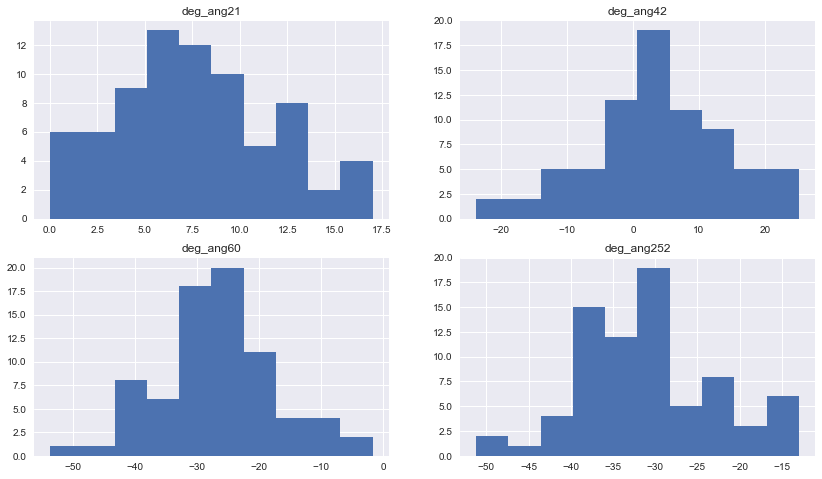

In [10]:
from abupy import ml

ml.show_orders_hist(max_failed_cluster_orders, ['buy_deg_ang21', 'buy_deg_ang42', 'buy_deg_ang60','buy_deg_ang252'])
print('分类簇中deg_ang60平均值为{0:.2f}'.format(
    max_failed_cluster_orders.buy_deg_ang60.mean()))

print('分类簇中deg_ang21平均值为{0:.2f}'.format(
    max_failed_cluster_orders.buy_deg_ang21.mean()))

print('分类簇中deg_ang42平均值为{0:.2f}'.format(
    max_failed_cluster_orders.buy_deg_ang42.mean()))

print('分类簇中deg_ang252平均值为{0:.2f}'.format(
    max_failed_cluster_orders.buy_deg_ang252.mean()))

训练数据集中deg_ang60平均值为1.61
训练数据集中deg_ang21平均值为3.32
训练数据集中deg_ang42平均值为2.69
训练数据集中deg_ang252平均值为2.54


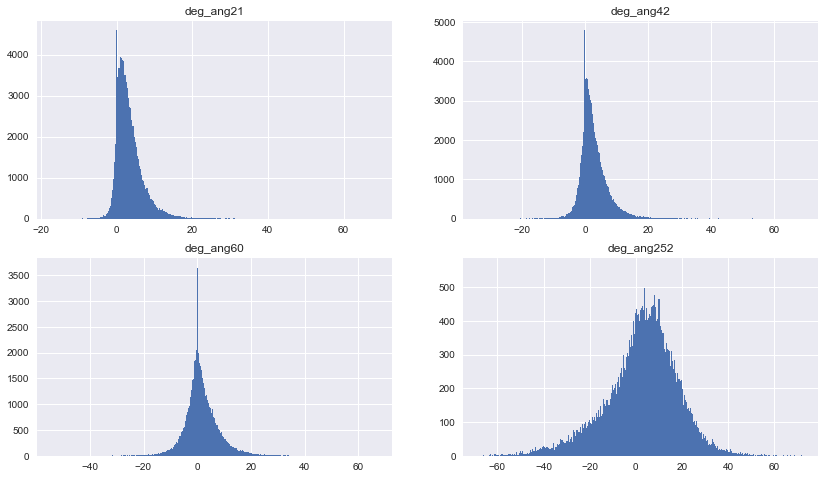

In [11]:
ml.show_orders_hist(orders_pd_train, ['buy_deg_ang21', 'buy_deg_ang42', 'buy_deg_ang60', 'buy_deg_ang252'])
print('训练数据集中deg_ang60平均值为{0:.2f}'.format(
    orders_pd_train.buy_deg_ang60.mean()))

print('训练数据集中deg_ang21平均值为{0:.2f}'.format(
    orders_pd_train.buy_deg_ang21.mean()))

print('训练数据集中deg_ang42平均值为{0:.2f}'.format(
    orders_pd_train.buy_deg_ang42.mean()))

print('训练数据集中deg_ang252平均值为{0:.2f}'.format(
    orders_pd_train.buy_deg_ang252.mean()))

In [ ]:
# 可视化靠后面的交易, 从65%－85%因为可以匹配绝大多数的n_folds情况，特别是适配默认初始值2，这样就是原始5也可以
start_plot_ind = int(max_failed_cluster_orders.shape[0] * 0.65)
end_plot_ind = int(max_failed_cluster_orders.shape[0] * 0.85)

for ind in np.arange(start_plot_ind, end_plot_ind):
    order_ind = int(max_failed_cluster_orders.iloc[ind].ind)
    # 交易快照文件保存在~/abu/data/save_png/中
    ABuMarketDrawing.plot_candle_from_order(ump_deg.fiter.order_has_ret.iloc[order_ind], save=True)

### 11.2.2 使用全局最优对分类簇集合进行筛选

In [13]:
brust_min = ump_deg.brust_min()
brust_min

array([-0.13,  0.  ,  0.65])

In [14]:
llps = ump_deg.cprs[(ump_deg.cprs['lps'] <= brust_min[0]) & (ump_deg.cprs['lms'] <= brust_min[1] )& (ump_deg.cprs['lrs'] >=brust_min[2])]
llps

,lcs,lrs,lps,lms
42_15,109.0,0.651376,-2.590113,-0.023763
43_15,67.0,0.671642,-3.200991,-0.047776
43_31,242.0,0.652893,-1.929739,-0.007974
45_15,57.0,0.666667,-2.230381,-0.039129
45_31,277.0,0.667870,-5.024114,-0.018138
47_31,294.0,0.676871,-9.385716,-0.031924
48_31,284.0,0.658451,-3.252707,-0.011453
49_26,444.0,0.650901,-5.683511,-0.012801
49_31,274.0,0.660584,-4.177177,-0.015245
51_26,621.0,0.650564,-10.427702,-0.016792


训练集中生效拦截的数量:3273
拦截的交易中正确拦截比例:0.6471127406049496
拦截生效后可提升比例:0.011869253333990684


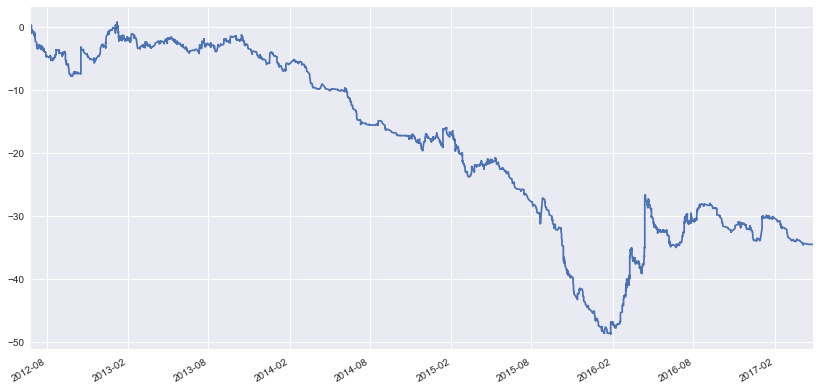

In [15]:
ump_deg.choose_cprs_component(llps)

In [16]:
ump_deg.dump_clf(llps)

please wait! dump_pickle....: /Users/Bailey/abu/data/ump/ump_main_umpdegfiter


### 11.2.3 跳空主裁

In [ ]:
from abupy import AbuUmpMainJump
# 耗时操作，大概需要10几分钟，具体根据电脑性能，cpu情况, 交易快照文件保存在~/abu/data/save_png/中
ump_jump = AbuUmpMainJump.ump_main_clf_dump(orders_pd_train, save_order=True)

In [7]:
ump_jump.fiter.df.head()

,result,jump_down_power,diff_down_days,jump_up_power,diff_up_days
2012-06-27,0,-13.687,106,1.425,68
2012-06-27,0,-2.984,123,1.027,209
2012-06-27,1,-3.332,61,1.217,146
2012-06-27,0,-4.037,238,1.042,370
2012-06-27,0,-1.465,238,2.836,189


In [8]:
print('失败概率最大的分类簇{0}'.format(ump_jump.cprs.lrs.argmax()))
# 拿出跳空失败概率最大的分类簇
max_failed_cluster_orders = ump_jump.nts[ump_jump.cprs.lrs.argmax()]
# 显示失败概率最大的分类簇，表11-6所示
max_failed_cluster_orders

失败概率最大的分类簇51_9


,result,jump_down_power,diff_down_days,jump_up_power,diff_up_days,ind,cluster,profit
2013-02-04,1,-1.090,18,1.070,359,12220,9,0.024375
2013-05-15,0,-1.199,19,2.317,201,17561,9,-0.004298
2013-05-15,0,-1.199,19,2.317,201,17572,9,-0.004298
2013-06-14,0,-1.034,15,2.644,162,18953,9,-0.039033
2014-06-06,0,-1.014,16,1.106,332,36415,9,-0.003674
2014-11-18,0,-1.094,17,1.552,276,44079,9,-0.015637
2014-11-18,0,-1.094,17,1.552,276,44082,9,-0.015637
2015-02-02,0,-1.048,17,1.934,290,46999,9,-0.028645
2015-05-19,0,-1.164,19,1.437,300,52132,9,-0.141317
2016-07-13,1,-1.141,18,2.118,242,69254,9,0.140476


In [ ]:
ml.show_orders_hist(max_failed_cluster_orders,
                    s_list=['jump_up_power', 'jump_down_power'])

print('分类簇中jump_up_power平均值为{0:.2f}'.format(
    max_failed_cluster_orders.jump_up_power.mean()))

print('分类簇中jump_down_power平均值为{0:.2f}'.format(
    max_failed_cluster_orders.jump_down_power.mean()))


print('训练数据集中jump_up_power平均值为{0:.2f}'.format(
    orders_pd_train.jump_up_power.mean()))

print('训练数据集中jump_down_power平均值为{0:.2f}'.format(
    orders_pd_train.jump_down_power.mean()))

### 11.2.4 价格主裁

In [ ]:
from abupy import AbuUmpMainPrice
# 耗时操作，大概需要10几分钟，具体根据电脑性能，cpu情况, 交易快照文件保存在~/abu/data/save_png/中
ump_price = AbuUmpMainPrice.ump_main_clf_dump(orders_pd_train, save_order=True)

In [33]:
ump_price.fiter.df.head()

,result,price_rank60,price_rank90,price_rank120,price_rank252
2012-06-13,1,1,0.956,0.967,0.901
2012-06-13,0,1,1.000,1.000,1.000
2012-06-13,1,1,1.000,1.000,1.000
2012-06-13,0,1,0.967,0.975,0.988
2012-06-13,0,1,1.000,1.000,0.810


In [34]:
print('失败概率最大的分类簇{0}'.format(ump_price.cprs.lrs.argmax()))

# 拿出价格失败概率最大的分类簇
max_failed_cluster_orders = ump_price.nts[ump_price.cprs.lrs.argmax()]
# 表11-8所示
max_failed_cluster_orders

失败概率最大的分类簇68_63


,result,price_rank60,price_rank90,price_rank120,price_rank252,ind,cluster,profit
2012-08-22,0,1,0.972,0.854,0.796,4508,63,-0.061189
2012-08-24,0,1,1.000,0.858,0.813,4583,63,-0.091603
2014-06-19,0,1,0.989,0.854,0.802,40112,63,-0.006374
2014-06-19,0,1,0.989,0.854,0.802,40113,63,-0.006374
2015-10-19,0,1,1.000,0.850,0.798,61136,63,-0.015438
2016-10-06,0,1,1.000,0.850,0.810,77990,63,-0.069804


### 11.2.5 波动主裁

In [ ]:
from abupy import AbuUmpMainWave
# 交易快照文件保存在~/abu/data/save_png/中
ump_wave = AbuUmpMainWave.ump_main_clf_dump(orders_pd_train, save_order=True)

In [35]:
ump_wave.fiter.df.head()

,result,wave_score1,wave_score2,wave_score3
2012-06-13,1,0.034,-0.069,-0.099
2012-06-13,0,0.026,-0.062,-0.085
2012-06-13,1,-0.041,-0.154,-0.154
2012-06-13,0,-0.129,-0.162,-0.169
2012-06-13,0,-0.074,-0.121,-0.125


In [36]:
print('失败概率最大的分类簇{0}'.format(ump_wave.cprs.lrs.argmax()))
# 拿出波动特征失败概率最大的分类簇
max_failed_cluster_orders = ump_wave.nts[ump_wave.cprs.lrs.argmax()]
# 表11-10所示
max_failed_cluster_orders

失败概率最大的分类簇83_62


,result,wave_score1,wave_score2,wave_score3,ind,cluster,profit
2012-06-20,0,1.087,0.905,1.136,500,62,-0.154083
2012-11-02,1,1.142,0.840,1.098,7874,62,0.045694
2014-02-11,1,1.083,0.813,1.089,33573,62,0.055178
2014-09-12,0,1.098,0.826,1.055,44049,62,-0.081127
2014-09-12,0,1.098,0.826,1.055,44063,62,-0.081127
2014-10-29,1,1.077,0.795,1.067,45424,62,0.280821
2014-11-19,0,1.172,0.858,1.123,47288,62,-0.010709
2014-11-19,0,1.172,0.858,1.123,47309,62,-0.010709
2015-01-21,0,1.190,0.859,1.157,49706,62,-0.108086
2015-02-06,0,1.126,0.930,1.167,50579,62,-0.062205


分类簇中wave_score1平均值为1.12
分类簇中wave_score3平均值为1.11
训练数据集中wave_score1平均值为0.49
训练数据集中wave_score3平均值为0.41


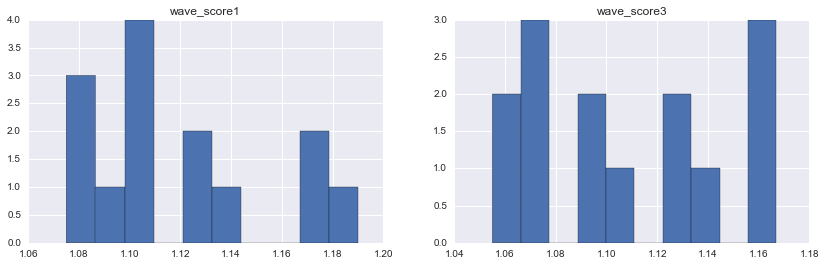

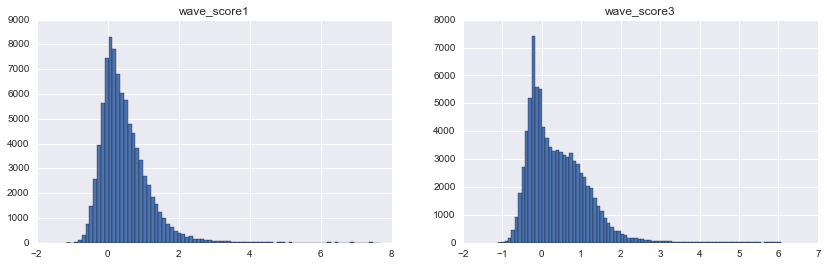

In [37]:
ml.show_orders_hist(max_failed_cluster_orders,
                    s_list=['wave_score1', 'wave_score3'])

print('分类簇中wave_score1平均值为{0:.2f}'.format(
    max_failed_cluster_orders.wave_score1.mean()))

print('分类簇中wave_score3平均值为{0:.2f}'.format(
    max_failed_cluster_orders.wave_score3.mean()))

ml.show_orders_hist(orders_pd_train,
                    s_list=['wave_score1', 'wave_score3'])

print('训练数据集中wave_score1平均值为{0:.2f}'.format(
    orders_pd_train.wave_score1.mean()))

print('训练数据集中wave_score3平均值为{0:.2f}'.format(
    orders_pd_train.wave_score3.mean()))

### 11.2.6 验证主裁是否称职

In [5]:
# 加载上一章回测的突破策略测试集数据
abu_result_tuple_test = abu.load_abu_result_tuple(5, EStoreAbu.E_STORE_TEST)

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_test_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_test_benchmark


买入后卖出的交易数量:8652
胜率:44.4406%
平均获利期望:10.9360%
平均亏损期望:-6.1797%
盈亏比:1.3414
策略收益: 71.3346%
基准收益: 98.3523%
策略年化收益: 14.2669%
基准年化收益: 19.6705%
策略买入成交比例:30.6504%
策略资金利用率比例:86.6122%
策略共执行1260个交易日


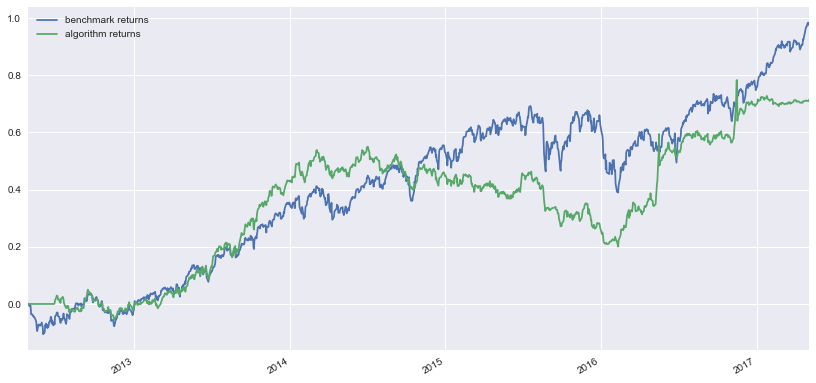

In [18]:
metrics = AbuMetricsBase(*abu_result_tuple_test)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

In [19]:
# 选取有交易结果的数据order_has_result
order_has_result = abu_result_tuple_test.orders_pd[abu_result_tuple_test.orders_pd.result != 0]

In [49]:
ump_wave.best_hit_cnt_info(ump_wave.llps)

mean_hit_failed = 2.0
effect_cnt = 154
effect rate = 0.00179591836735%


## 如果之前有本地化后的裁判，可以通过如下代码直接加载，但如上面best_hit_cnt_info等方法将执行错误

In [20]:
from abupy import AbuUmpMainDeg, AbuUmpMainJump, AbuUmpMainPrice, AbuUmpMainWave
ump_deg = AbuUmpMainDeg(predict=True)
ump_jump = AbuUmpMainJump(predict=True)
ump_price = AbuUmpMainPrice(predict=True)
ump_wave = AbuUmpMainWave(predict=True)

In [21]:
import ast

def apply_ml_features_ump(order, predicter, need_hit_cnt):
    if not isinstance(order.ml_features, dict):
        # 低版本pandas dict对象取出来会成为str
        ml_features = ast.literal_eval(order.ml_features)
    else:
        ml_features = order.ml_features

    return predicter.predict_kwargs(need_hit_cnt=need_hit_cnt, **ml_features)

# 角度主裁开始裁决
order_has_result['ump_deg'] = order_has_result.apply(apply_ml_features_ump, axis=1, args=(ump_deg, 2,))
# 跳空主裁开始裁决
order_has_result['ump_jump'] = order_has_result.apply(apply_ml_features_ump, axis=1, args=(ump_jump, 2,))
# 波动主裁开始裁决
order_has_result['ump_wave'] = order_has_result.apply(apply_ml_features_ump, axis=1, args=(ump_wave, 2,))
# 价格主裁开始裁决
order_has_result['ump_price'] = order_has_result.apply(apply_ml_features_ump, axis=1, args=(ump_price, 2,))

please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_main_umpdegfiter
please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_main_umpjumpfiter
please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_main_umpwavefiter
please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_main_umppricefiter


In [11]:
block_pd = order_has_result.filter(regex='^ump_*')
block_pd['sum_bk'] = block_pd.sum(axis=1)
block_pd['result'] = order_has_result['result']

block_pd = block_pd[block_pd.sum_bk > 0]
print('四个裁判整体拦截正确率{:.2f}%'.format(block_pd[block_pd.result == -1].result.count() / 
                                  block_pd.result.count() * 100))
block_pd.tail()

四个裁判整体拦截正确率67.53%


,ump_deg,ump_jump,ump_wave,ump_price,sum_bk,result
2017-01-24,0,0,1,0,1,-1
2017-01-25,0,0,0,1,1,1
2017-02-13,0,0,0,1,1,-1
2017-02-14,1,0,0,0,1,-1
2017-03-14,1,0,0,0,1,1


In [12]:
from sklearn import metrics
def sub_ump_show(block_name):
    sub_block_pd = block_pd[(block_pd[block_name] == 1)]
    # 如果失败就正确 －1->1 1->0
    sub_block_pd.result = np.where(sub_block_pd.result == -1, 1, 0)
    return metrics.accuracy_score(sub_block_pd[block_name], sub_block_pd.result)

print('角度裁判拦截正确率{:.2f}%'.format(sub_ump_show('ump_deg') * 100))
print('跳空裁判拦截正确率{:.2f}%'.format(sub_ump_show('ump_jump') * 100))
print('波动裁判拦截正确率{:.2f}%'.format(sub_ump_show('ump_wave') * 100))
print('价格裁判拦截正确率{:.2f}%'.format(sub_ump_show('ump_price') * 100))

角度裁判拦截正确率67.78%
跳空裁判拦截正确率66.67%
波动裁判拦截正确率65.12%
价格裁判拦截正确率66.67%


### 11.2.7 在abu系统中开启主裁拦截模式

In [32]:
from abupy import AbuFactorBuyBreak
from abupy import AbuFactorAtrNStop
from abupy import AbuFactorPreAtrNStop
from abupy import AbuFactorCloseAtrNStop

# 设置初始资金数
read_cash = 2000000
abupy.beta.atr.g_atr_pos_base = 0.015 

# 需要开启特征生成，默认False, 因为裁判开启需要生成特征做为输入
abupy.env.g_enable_ml_feature = True
# 使用最后一次切割好的测试集数据
abupy.env.g_enable_last_split_test = True

# 设置选股因子，None为不使用选股因子
stock_pickers = None
# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak}, 
               {'xd': 42, 'class': AbuFactorBuyBreak}]
                
# 卖出因子继续使用上一章使用的因子
sell_factors = [ 
                {'stop_loss_n':1.0, 'stop_win_n':3.0, 'class': AbuFactorAtrNStop}, 
                {'class': AbuFactorPreAtrNStop, 'pre_atr_n':1.5}, 
                {'class': AbuFactorCloseAtrNStop, 'close_atr_n':1.5}
               ]
choice_symbols = None

In [14]:
# 上面的设置与上一章进行测试集回测设置相同，如下为不同点，开启多个主裁拦截开关
abupy.env.g_enable_ump_main_deg_block = True
abupy.env.g_enable_ump_main_jump_block = True
abupy.env.g_enable_ump_main_price_block = True
abupy.env.g_enable_ump_main_wave_block = True

# 进行全市场回测使用本地加载数据模式E_DATA_FETCH_FORCE_LOCAL，这样也保证了数据环境与之前的回测环境是一摸一样的.

In [15]:
abupy.env.g_data_fetch_mode = abupy.env.EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

In [16]:
abu_result_tuple_test_ump, _ = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=choice_symbols, n_folds=5)

pid:20911 pick times complete:90%


In [25]:
abu.store_abu_result_tuple(abu_result_tuple_test_ump, 5, EStoreAbu.E_STORE_TEST_UMP)

## 如果有存贮，可以直接load

In [4]:
abu_result_tuple_test_ump = abu.load_abu_result_tuple(5, EStoreAbu.E_STORE_TEST_UMP)

In [27]:
metric_ump = AbuMetricsBase(*abu_result_tuple_test_ump)
metric_ump.fit_metrics()
metric_ump.plot_order_returns_cmp(only_info=True)

买入后卖出的交易数量:8738
胜率:44.38%
平均获利期望:10.34%
平均亏损期望:-5.95%
盈亏比:1.4301
所有交易收益比例和：115.6659 


In [24]:
metric_test = AbuMetricsBase(*abu_result_tuple_test)
metric_test.fit_metrics()
metric_test.plot_order_returns_cmp(only_info=True)

买入后卖出的交易数量:9061
胜率:43.91%
平均获利期望:10.6%
平均亏损期望:-6.17%
盈亏比:1.4
所有交易收益比例和：113.1954 


## 11.3 边裁

### 11.3.1 角度边裁

In [24]:
from abupy import AbuUmpEdgeDeg 
edge_deg = AbuUmpEdgeDeg(orders_pd_train)
edge_deg.fiter.df.head()

,profit,profit_cg,deg_ang21,deg_ang42,deg_ang60,deg_ang252
2012-06-27,-1253.26,-0.744110,20.810,20.123,10.881,-35.994
2012-06-27,412.92,0.080173,4.911,1.140,-9.395,-20.538
2012-06-27,-294.44,-0.178811,21.643,6.520,-5.124,2.189
2012-06-27,-449.79,-0.077616,3.938,4.310,2.269,2.376
2012-06-27,162.15,0.029955,4.975,6.791,6.201,-4.017


In [25]:
edge_deg.fit()
edge_deg.dump_clf()

please wait! dump_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umpdegfiter


### 11.3.2 价格边裁

In [26]:
from abupy import AbuUmpEdgePrice 
edge_price = AbuUmpEdgePrice(orders_pd_train)
edge_price.fit()
edge_price.dump_clf()
# 表11-13所示
edge_price.fiter.df.head()

please wait! dump_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umppricefiter


,profit,profit_cg,price_rank60,price_rank90,price_rank120,price_rank252,p_rk_cg,rk
2012-06-27,-1253.26,-0.744110,1.000,0.767,0.575,0.274,13.0,-1
2012-06-27,412.92,0.080173,0.717,0.478,0.358,0.171,67837.0,1
2012-06-27,-294.44,-0.178811,1.000,0.900,0.825,0.897,1666.0,-1
2012-06-27,-449.79,-0.077616,0.992,0.950,0.738,0.790,11622.0,-1
2012-06-27,162.15,0.029955,1.000,0.933,0.708,0.623,57134.0,0


### 11.3.3 波动边裁

In [27]:
from abupy import AbuUmpEdgeWave 
edge_wave = AbuUmpEdgeWave(orders_pd_train)
edge_wave.fit()
edge_wave.dump_clf()
# 表11-14所示
edge_wave.fiter.df.head()

please wait! dump_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umpwavefiter


,profit,profit_cg,wave_score1,wave_score2,wave_score3,p_rk_cg,rk
2012-06-27,-1253.26,-0.744110,0.524,0.644,0.638,13.0,-1
2012-06-27,412.92,0.080173,-0.203,-0.234,-0.179,67837.0,1
2012-06-27,-294.44,-0.178811,0.441,0.363,0.210,1666.0,-1
2012-06-27,-449.79,-0.077616,0.062,-0.026,-0.059,11622.0,-1
2012-06-27,162.15,0.029955,0.263,0.131,0.113,57134.0,0


### 11.3.4 综合边裁

In [28]:
from abupy import AbuUmpEdgeFull 
edge_full = AbuUmpEdgeFull(orders_pd_train)
edge_full.fit()
edge_full.dump_clf()
edge_full.fiter.df.head()

please wait! dump_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umpfullfiter


,profit,profit_cg,deg_ang21,deg_ang42,deg_ang60,deg_ang252,price_rank60,price_rank90,price_rank120,price_rank252,wave_score1,wave_score2,wave_score3,atr_std,p_rk_cg,rk
2012-06-27,-1253.26,-0.744110,20.810,20.123,10.881,-35.994,1.000,0.767,0.575,0.274,0.524,0.644,0.638,0.739,13.0,-1
2012-06-27,412.92,0.080173,4.911,1.140,-9.395,-20.538,0.717,0.478,0.358,0.171,-0.203,-0.234,-0.179,-0.123,67837.0,1
2012-06-27,-294.44,-0.178811,21.643,6.520,-5.124,2.189,1.000,0.900,0.825,0.897,0.441,0.363,0.210,0.408,1666.0,-1
2012-06-27,-449.79,-0.077616,3.938,4.310,2.269,2.376,0.992,0.950,0.738,0.790,0.062,-0.026,-0.059,-0.208,11622.0,-1
2012-06-27,162.15,0.029955,4.975,6.791,6.201,-4.017,1.000,0.933,0.708,0.623,0.263,0.131,0.113,0.230,57134.0,0


### 11.3.5 验证边裁是否称职

In [29]:
import ast
def apply_ml_features_edge(order, predicter):
    if not isinstance(order.ml_features, dict):
        # 低版本pandas dict对象取出来会成为str
        ml_features = ast.literal_eval(order.ml_features)
    else:
        ml_features = order.ml_features
    # 边裁进行裁决
    edge = predicter.predict(**ml_features)
    return edge.value

# 角度边裁开始裁决
order_has_result['edge_deg'] = order_has_result.apply(
    apply_ml_features_edge, axis=1, args=(edge_deg,))
# 价格边裁开始裁决
order_has_result['edge_price'] = order_has_result.apply(
    apply_ml_features_edge, axis=1, args=(edge_price,))
# 综合边裁开始裁决
order_has_result['edge_full'] = order_has_result.apply(
    apply_ml_features_edge, axis=1, args=(edge_full,))
# 波动边裁开始裁决
order_has_result['edge_wave'] = order_has_result.apply(
    apply_ml_features_edge, axis=1, args=(edge_wave,))

please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umpdegfiter
please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umppricefiter
please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umpfullfiter
please wait! load_pickle....: /Users/Bailey/abu/data/ump/ump_edge_umpwavefiter


In [16]:
block_pd = order_has_result.filter(regex='^edge_*')
"""
    由于predict返回的结果中1代表win top
    但是我们只需要知道loss_top，所以只保留-1, 其他1转换为0。
"""
block_pd['edge_block'] = \
    np.where(np.min(block_pd, axis=1) == -1, -1, 0)

# 拿出真实的交易结果
block_pd['result'] = order_has_result['result']
# 拿出-1的结果，即判定loss_top的
block_pd = block_pd[block_pd.edge_block == -1]

print('四个边裁拦截交易总数{}， 拦截率{:.2f}%'.format(
    block_pd.shape[0],
    block_pd.shape[0] / order_has_result.shape[0] * 100))
# 表11-15所示 
block_pd.head()

四个边裁拦截交易总数2584， 拦截率28.52%


,edge_deg,edge_price,edge_full,edge_wave,edge_block,result
2012-06-13,1,-1,-1,-1,-1,-1
2012-06-13,-1,0,-1,-1,-1,-1
2012-06-15,0,-1,0,-1,-1,1
2012-06-15,0,-1,0,0,-1,1
2012-06-15,-1,0,0,0,-1,1


In [18]:
from sklearn import metrics
def sub_edge_show(edge_name):
    sub_edge_block_pd = order_has_result[(order_has_result[edge_name] == -1)]
    return metrics.accuracy_score(sub_edge_block_pd[edge_name], sub_edge_block_pd.result) * 100, sub_edge_block_pd.shape[0]

print('角度边裁拦截正确率{0:.2f}%, 拦截交易数量{1:}'.format(*sub_edge_show('edge_deg')))
print('综合边裁拦截正确率{0:.2f}%, 拦截交易数量{1:}'.format(*sub_edge_show('edge_full')))
print('波动边裁拦截正确率{0:.2f}%, 拦截交易数量{1:}'.format(*sub_edge_show('edge_wave')))
print('价格边裁拦截正确率{0:.2f}%, 拦截交易数量{1:}'.format(*sub_edge_show('edge_price')))

角度边裁拦截正确率66.34%, 拦截交易数量826
综合边裁拦截正确率69.48%, 拦截交易数量937
波动边裁拦截正确率64.26%, 拦截交易数量817
价格边裁拦截正确率64.29%, 拦截交易数量756


### 11.3.6 在abu系统中开启边裁拦截模式

In [33]:
# 开启主裁
abupy.env.g_enable_ump_main_deg_block = True
abupy.env.g_enable_ump_main_jump_block = True
abupy.env.g_enable_ump_main_price_block = True
abupy.env.g_enable_ump_main_wave_block = True
# 开启边裁
abupy.env.g_enable_ump_edge_deg_block = True
abupy.env.g_enable_ump_edge_full_block = True
abupy.env.g_enable_ump_edge_price_block = True
abupy.env.g_enable_ump_edge_wave_block = True

# 需要开启特征生成，默认False, 因为裁判开启需要生成特征做为输入
abupy.env.g_enable_ml_feature = True
# 使用最后一次切割好的测试集数据
abupy.env.g_enable_last_split_test = True

# 使用local
abupy.env.g_data_fetch_mode = abupy.env.EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

abu_result_tuple_test_ump_edge, _ = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=choice_symbols, n_folds=5)
abu.store_abu_result_tuple(abu_result_tuple_test_ump_edge, 5, EStoreAbu.E_STORE_TEST_UMP_WITH_EDGE)

please wait! dump_pickle....: /Users/Bailey/abu/data/cache/n5_test_ump_with_edge_capital
please wait! dump_pickle....: /Users/Bailey/abu/data/cache/n5_test_ump_with_edge_benchmark


In [7]:
# 如有存储，直接读取
abu_result_tuple_test_ump_edge = abu.load_abu_result_tuple(5, EStoreAbu.E_STORE_TEST_UMP_WITH_EDGE)

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_test_ump_with_edge_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_test_ump_with_edge_benchmark


In [25]:
metric_test.plot_order_returns_cmp(only_info=True)

买入后卖出的交易数量:9061
胜率:43.91%
平均获利期望:10.6%
平均亏损期望:-6.17%
盈亏比:1.4
所有交易收益比例和：113.1954 


In [28]:
metric_ump.plot_order_returns_cmp(only_info=True)

买入后卖出的交易数量:8738
胜率:44.38%
平均获利期望:10.34%
平均亏损期望:-5.95%
盈亏比:1.4301
所有交易收益比例和：115.6659 


In [62]:
metric_ump_edge = AbuMetricsBase(*abu_result_tuple_test_ump_edge)
metric_ump_edge.fit_metrics()
metric_ump_edge.plot_order_returns_cmp(only_info=True)

买入后卖出的交易数量:6477
胜率:45.23%
平均获利期望:10.71%
平均亏损期望:-5.92%
盈亏比:1.5191
所有交易收益比例和：115.6664 


_____

## A股市场 裁判试验展示

### 直接load c9中已缓存的训练集，测试集回测数据

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_train_a_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_train_a_benchmark
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_test_a_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_test_a_benchmark


买入后卖出的交易数量:42247
胜率:44.86%
平均获利期望:13.83%
平均亏损期望:-7.74%
盈亏比:1.538
策略收益: 53.83%
基准收益: 6.9%
策略年化收益: 7.98%
基准年化收益: 1.02%
策略买入成交比例: 59.09%
策略资金利用率比例: 60.51%
策略共执行1700个交易日


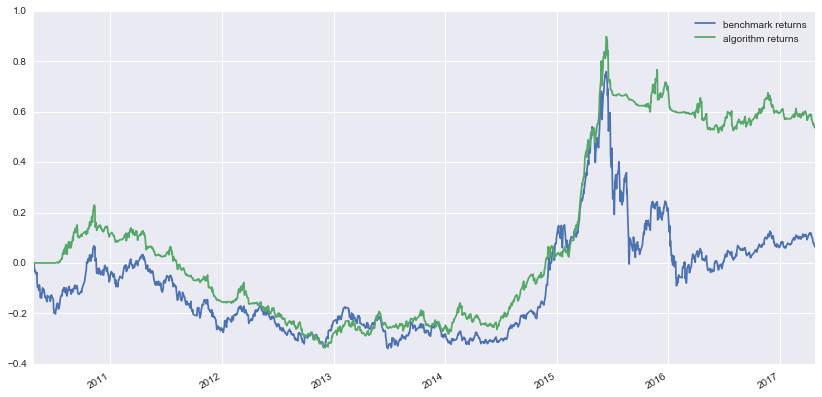

买入后卖出的交易数量:5288
胜率:46.48%
平均获利期望:12.22%
平均亏损期望:-7.12%
盈亏比:1.6378
策略收益: 88.76%
基准收益: 6.9%
策略年化收益: 13.16%
基准年化收益: 1.02%
策略买入成交比例: 52.35%
策略资金利用率比例: 61.45%
策略共执行1700个交易日


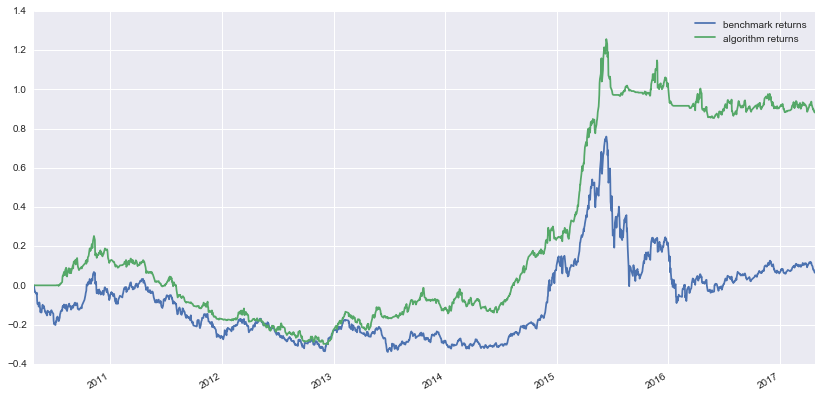

In [5]:
# 读取A股市场之前保存的训练集交易数据
abu_result_tuple_train_a = abu.load_abu_result_tuple(n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME,
                                                     custom_name='train_a')
orders_pd_train_a = abu_result_tuple_train_a.orders_pd
metrics_train_a = AbuMetricsBase(*abu_result_tuple_train_a)
metrics_train_a.fit_metrics()

# 加载A股市场回测的突破策略测试集数据
abu_result_tuple_test_a = abu.load_abu_result_tuple(n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME,
                                                    custom_name='test_a')
metrics_test_a = AbuMetricsBase(*abu_result_tuple_test_a)
metrics_test_a.fit_metrics()

# 选取有交易结果的数据order_has_result
order_has_result_a = abu_result_tuple_test_a.orders_pd[abu_result_tuple_test_a.orders_pd.result != 0]

metrics_train_a.plot_returns_cmp(only_show_returns=True)
metrics_test_a.plot_returns_cmp(only_show_returns=True)

In [ ]:
from abupy import AbuUmpMainDeg
from abupy import AbuUmpMainJump
from abupy import AbuUmpMainPrice
from abupy import AbuUmpMainWave

from abupy import AbuUmpEdgeDeg
from abupy import AbuUmpEdgePrice
from abupy import AbuUmpEdgeWave
from abupy import AbuUmpEdgeFull

def train_ump():
    """
    A股市场回测训练裁判,
    :return:
    """

    """
        主裁
    """
    print('AbuUmpMainDeg begin...')
    AbuUmpMainDeg.ump_main_clf_dump(orders_pd_train_a, save_order=True, show_order=False)
    print('AbuUmpMainJump begin...')
    AbuUmpMainJump.ump_main_clf_dump(orders_pd_train_a, save_order=True, show_order=False)
    print('AbuUmpMainPrice begin...')
    AbuUmpMainPrice.ump_main_clf_dump(orders_pd_train, save_order=True, show_order=False)
    print('AbuUmpMainWave begin...')
    AbuUmpMainWave.ump_main_clf_dump(orders_pd_train, save_order=True, show_order=False)

    """
        边裁
    """
    print('AbuUmpEdgeDeg begin...')
    edge_deg = AbuUmpEdgeDeg(orders_pd_train_a)
    edge_deg.fit()
    edge_deg.dump_clf()

    print('AbuUmpEdgePrice begin...')
    edge_price = AbuUmpEdgePrice(orders_pd_train_a)
    edge_price.fit()
    edge_price.dump_clf()

    print('AbuUmpEdgeWave begin...')
    edge_wave = AbuUmpEdgeWave(orders_pd_train_a)
    edge_wave.fit()
    edge_wave.dump_clf()

    print('AbuUmpEdgeFull begin...')
    edge_full = AbuUmpEdgeFull(orders_pd_train_a)
    edge_full.fit()
    edge_full.dump_clf()
train_ump()

In [8]:
"""
    A股市场回测开启主裁，边裁拦截模式
"""

start = '2010-04-26'
end = '2017-04-26'


def ump_test_a_market(from_cache=False):
    """
    11.4.2 A股市场回测开启主裁，边裁拦截模式
    :return:
    """
    # 开启主裁
    abupy.env.g_enable_ump_main_deg_block = True
    abupy.env.g_enable_ump_main_jump_block = True
    abupy.env.g_enable_ump_main_price_block = True
    abupy.env.g_enable_ump_main_wave_block = True
    # 开启边裁
    abupy.env.g_enable_ump_edge_deg_block = True
    abupy.env.g_enable_ump_edge_full_block = True
    abupy.env.g_enable_ump_edge_price_block = True
    abupy.env.g_enable_ump_edge_wave_block = True

    # 需要开启特征生成，默认False, 因为裁判开启需要生成特征做为输入
    abupy.env.g_enable_ml_feature = True
    # 使用最后一次切割好的测试集数据
    abupy.env.g_enable_last_split_test = True

    # 使用local
    abupy.env.g_data_fetch_mode = abupy.env.EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

    # A股市场回测全局设置
    from abupy import EMarketTargetType
    abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN

    # 初始化资金800万
    read_cash = 8000000
    # 0.0015 * 10
    abupy.beta.atr.g_atr_pos_base = 0.015
    choice_symbols = None

    if from_cache:
        # 如有存储，直接读取
        abu_result_tuple_test_ump_edge = abu.load_abu_result_tuple(n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME,
                                                                   custom_name='train_a_ump_with_edg')
    else:
        # 回测使用start, end参数
        abu_result_tuple_test_ump_edge, _ = abu.run_loop_back(read_cash,
                                                              buy_factors, sell_factors, stock_pickers,
                                                              choice_symbols=choice_symbols, start=start, end=end)
        abu.store_abu_result_tuple(abu_result_tuple_test_ump_edge, n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME,
                                   custom_name='train_a_ump_with_edg')

    print('none ump return:')
    # 未启动裁判的回测结果
    metrics_test_a.plot_order_returns_cmp(only_info=True)

    print('********************************************************************************************************/n')

    print('with ump return:')
    # 启动裁判的回测结果
    metric_ump_edge = AbuMetricsBase(*abu_result_tuple_test_ump_edge)
    metric_ump_edge.fit_metrics()
    metric_ump_edge.plot_order_returns_cmp(only_info=True)

In [ ]:
# 裁判介入进行测试集回测
ump_test_a_market()

## 直接从缓存加载裁判介入进行测试集回测

In [9]:
ump_test_a_market(from_cache=True)

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_train_a_ump_with_edg_capital


买入后卖出的交易数量:5288
胜率:46.48%
平均获利期望:12.22%
平均亏损期望:-7.12%
盈亏比:1.6378
所有交易收益比例和：104.0656 


please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_train_a_ump_with_edg_benchmark
none ump return:
********************************************************************************************************/n
with ump return:


买入后卖出的交易数量:3109
胜率:53.1%
平均获利期望:13.02%
平均亏损期望:-6.68%
盈亏比:2.4294
所有交易收益比例和：120.6757 
